In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
import pathlib

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url,extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [6]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

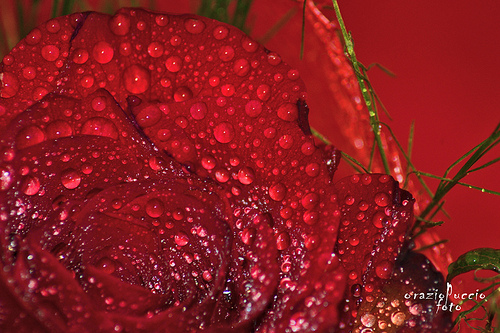

In [11]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=10,
    image_size = [180,180],
    batch_size=32
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [18]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=10,
    image_size=[180,180],
    batch_size=32
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [19]:
class_name = train_ds.class_names
class_name

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [21]:
for img,label in train_ds:
  print(img.shape)
  print(label.shape)
  break

(32, 180, 180, 3)
(32,)


In [23]:
standardize = tf.keras.layers.Rescaling(1./255)
standardized_ds = train_ds.map(lambda x,y:(standardize(x),y))
for img , label in standardized_ds:
  print(np.max(img[0]))
  print(np.min(img[0]))
  break
for img , label in train_ds:
  print(np.max(img[0]))
  print(np.min(img[0]))
  break

1.0
0.0
253.52466
0.17779541
